In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [135]:
trainData = pd.read_csv("trainingData.csv")
valData = pd.read_csv("validationData.csv")
trainData.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [137]:
def dataset_info(df, name):
    print(f"\n{name} Dataset Info:\n")
    print(df.info())
    print("\nData Types:\n", df.dtypes)
    print("\nMissing Values:\n", df.isnull().sum().sum())
    print("\nBasic Statistics:\n", df.describe())

In [139]:
dataset_info(trainData, 'Training')


Training Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB
None

Data Types:
 WAP001              int64
WAP002              int64
WAP003              int64
WAP004              int64
WAP005              int64
                    ...  
SPACEID             int64
RELATIVEPOSITION    int64
USERID              int64
PHONEID             int64
TIMESTAMP           int64
Length: 529, dtype: object

Missing Values:
 0

Basic Statistics:
              WAP001        WAP002   WAP003   WAP004        WAP005  \
count  19937.000000  19937.000000  19937.0  19937.0  19937.000000   
mean      99.823644     99.820936    100.0    100.0     99.613733   
std        5.866842      5.798156      0.0      0.0      8.615657   
min      -97.000000    -90.000000    100.0    100.0    -97.000000   
25%      100.000000    100.000000    100.0    100.0    100.000000   
50%      100.00000

In [141]:
wap_columns = [col for col in trainData.columns if 'WAP' in col]

trainData[wap_columns] = trainData[wap_columns].replace(100, np.nan)

scaler = MinMaxScaler(feature_range=(0, 1))
trainData[wap_columns] = scaler.fit_transform(trainData[wap_columns])

trainData[wap_columns] = trainData[wap_columns].fillna(0)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:701: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:718: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [143]:
trainData

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.027027,0.0,0.0,...,0.0,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,-7485.4686,4.864875e+06,3,1,1,2,18,10,1371710683
19933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,-7390.6206,4.864836e+06,1,2,140,2,18,10,1371710402
19934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,-7516.8415,4.864889e+06,3,1,13,2,18,10,1371710921
19935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,-7537.3219,4.864896e+06,3,1,113,2,18,10,1371711049


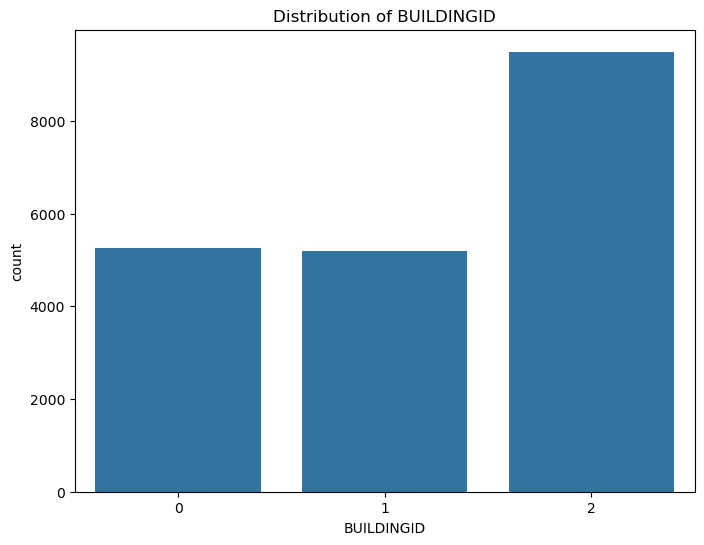

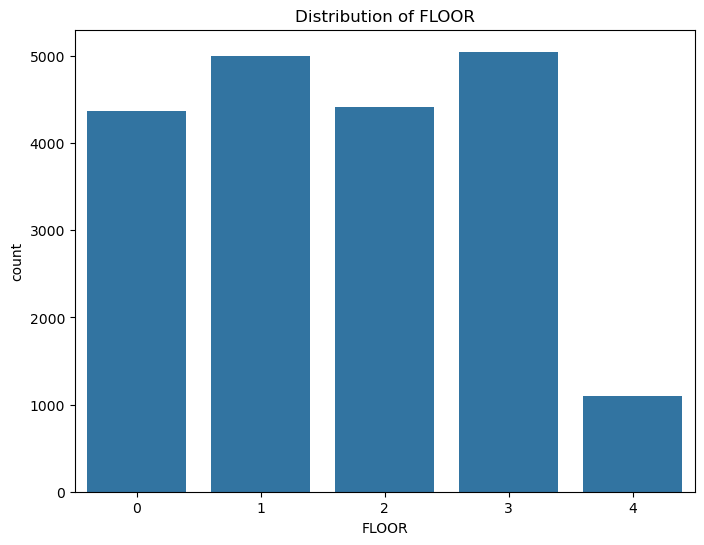

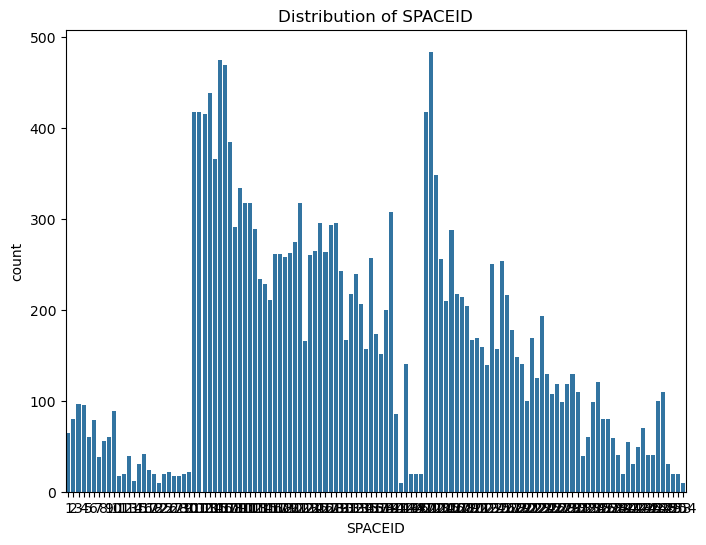

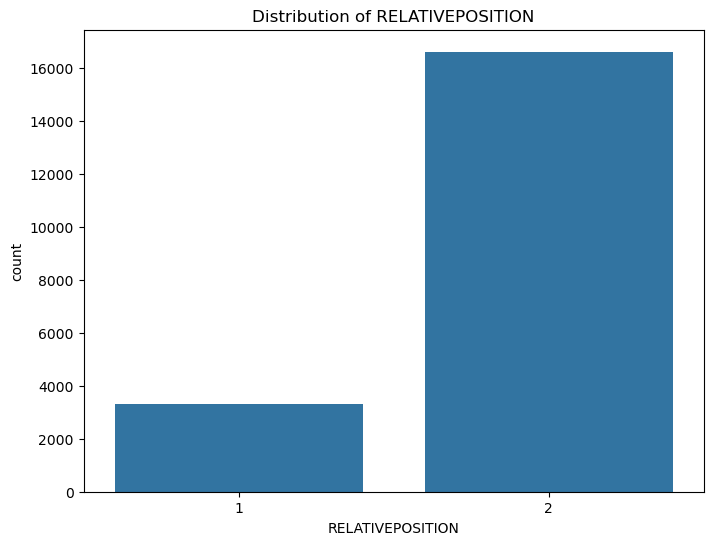

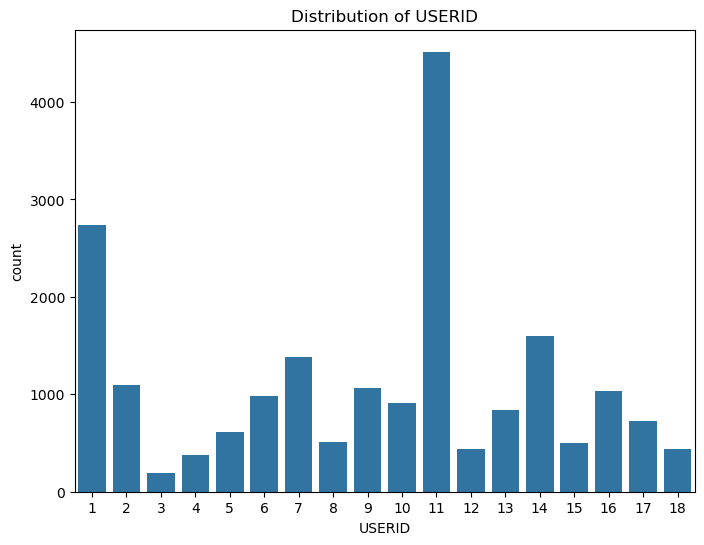

In [120]:
categorical_features = ['BUILDINGID', 'FLOOR', 'SPACEID', 'RELATIVEPOSITION', 'USERID']

for col in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=trainData[col])
    plt.title(f'Distribution of {col}')
    plt.show()

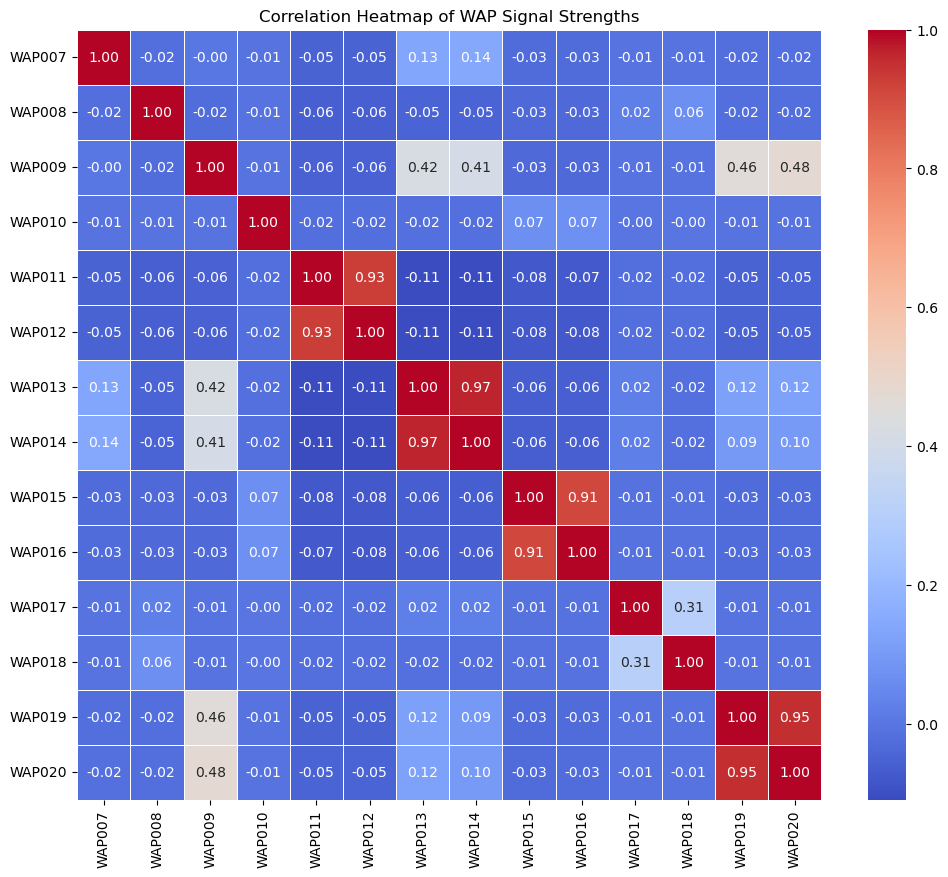

In [145]:
wap_matrix = trainData[wap_columns[6:20]]
corr_matrix = wap_matrix.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of WAP Signal Strengths")
plt.savefig("correlation_heatmap.png")
plt.show()

/var/folders/ls/0gxcl53977z43zd_34r5xz7w0000gn/T/ipykernel_26752/1396942021.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  trainData["Mean_Signal_Strength"] = trainData[wap_columns].mean(axis=1)
/var/folders/ls/0gxcl53977z43zd_34r5xz7w0000gn/T/ipykernel_26752/1396942021.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  trainData["Max_Signal_Strength"] = trainData[wap_columns].max(axis=1)


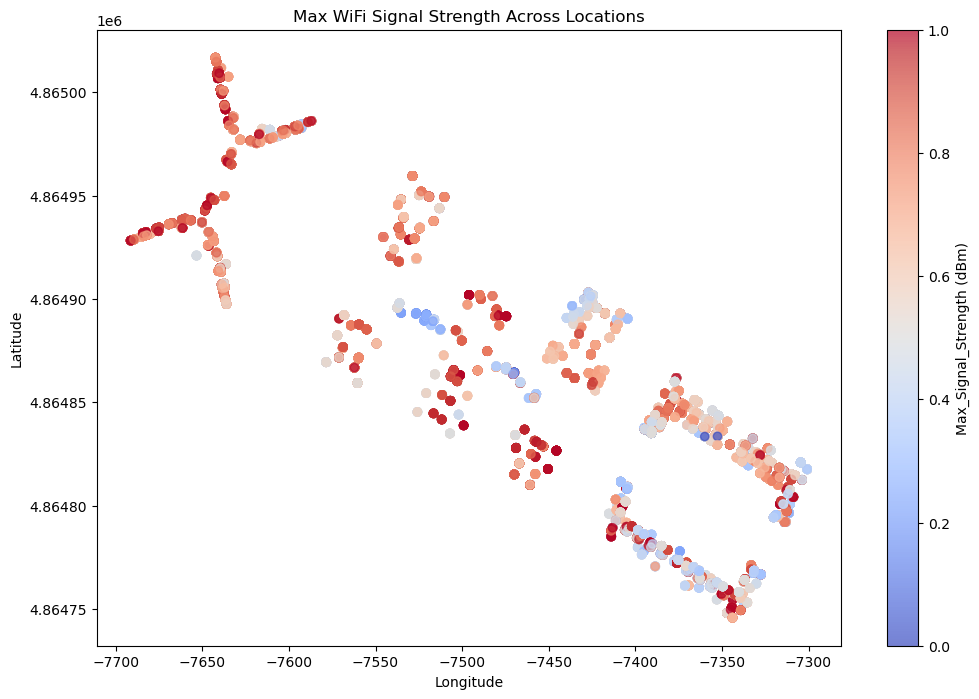

In [147]:
wap_columns = [col for col in trainData.columns if col.startswith('WAP')]

trainData["Mean_Signal_Strength"] = trainData[wap_columns].mean(axis=1)
trainData["Max_Signal_Strength"] = trainData[wap_columns].max(axis=1)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(trainData["LONGITUDE"], trainData["LATITUDE"], 
                      c=trainData["Max_Signal_Strength"], cmap="coolwarm", alpha=0.7)

plt.title("Max WiFi Signal Strength Across Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label="Max_Signal_Strength (dBm)")
plt.savefig("max_signal_strength_map.png", dpi=300, bbox_inches='tight') 
plt.show()

# Some parts of this code were refined with the assistance of ChatGPT.

Unique Buildings: [1 0 2]


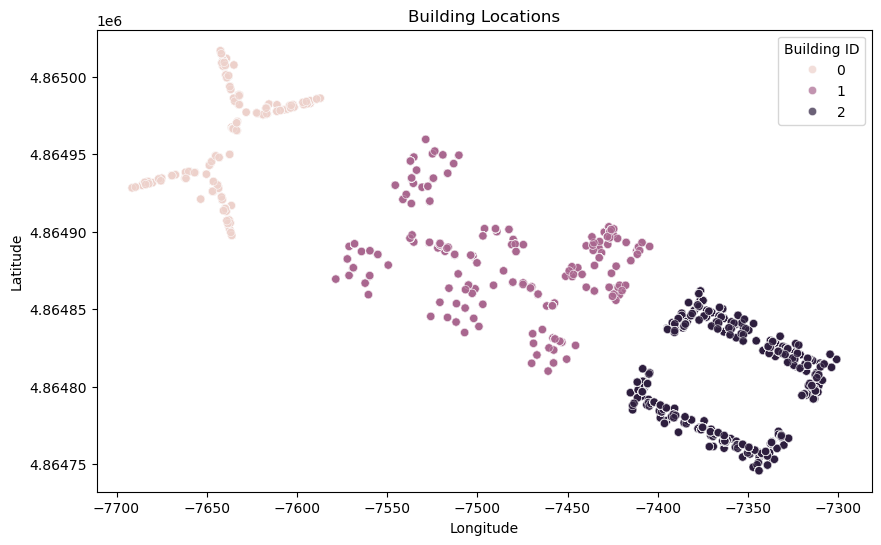

In [149]:
unique_buildings = trainData["BUILDINGID"].unique()
print("Unique Buildings:", unique_buildings)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=trainData, x="LONGITUDE", y="LATITUDE", hue="BUILDINGID", alpha=0.7)

plt.title("Building Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Building ID")
plt.savefig("building_locations.png")
plt.show()

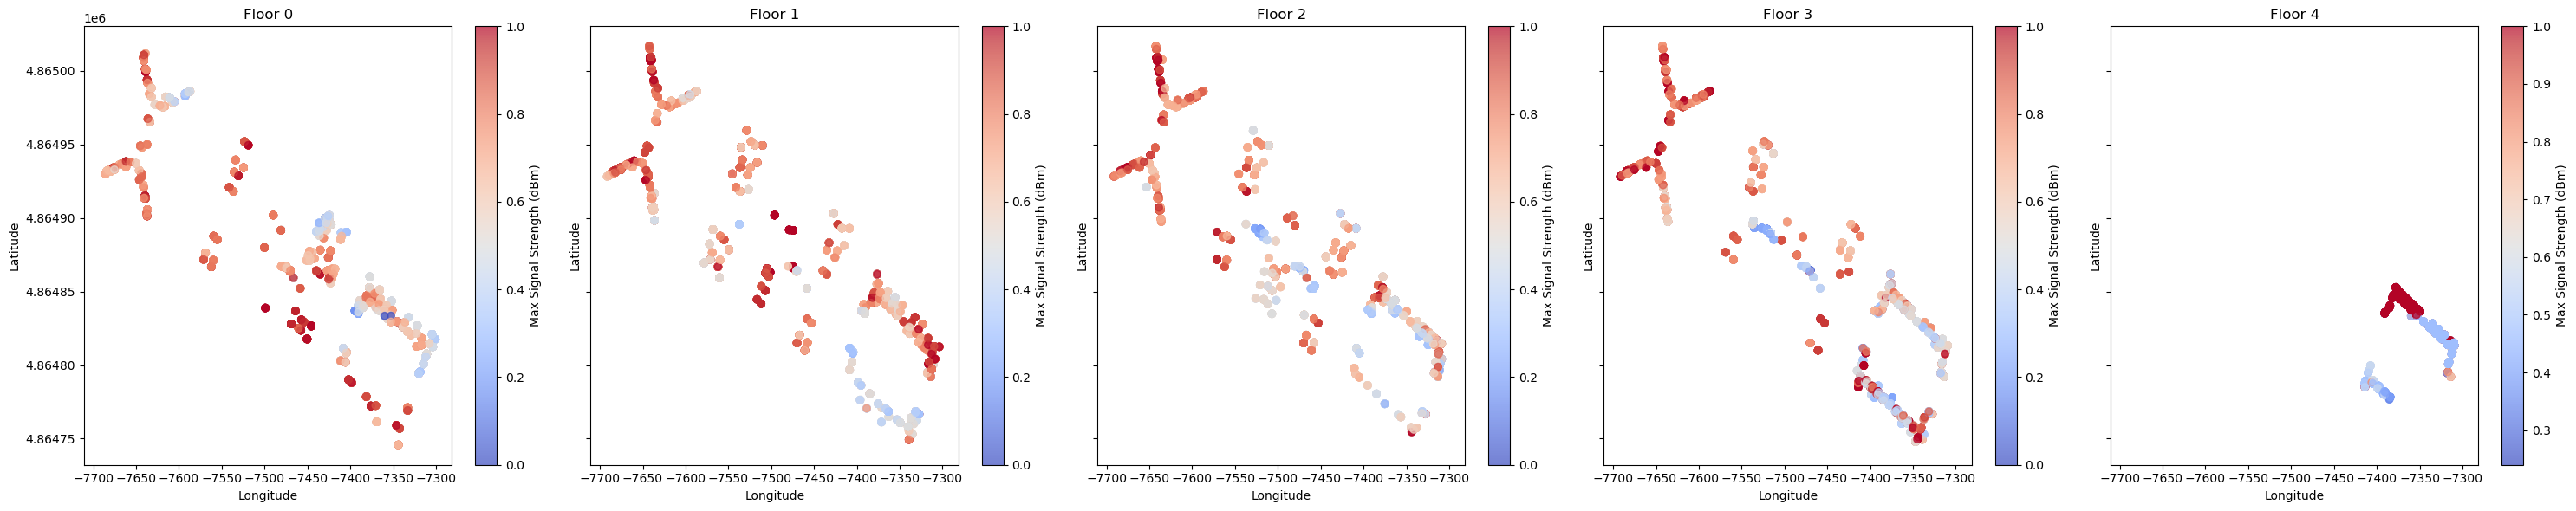

In [153]:
floors = sorted(trainData["FLOOR"].unique())

fig, axs = plt.subplots(1, len(floors), figsize=(30, 6), sharex=True, sharey=True)

for i, floor in enumerate(floors):
    floor_data = trainData[trainData["FLOOR"] == floor]
    scatter = axs[i].scatter(floor_data["LONGITUDE"], floor_data["LATITUDE"], 
                             c=floor_data["Max_Signal_Strength"], cmap="coolwarm", alpha=0.7)
    axs[i].set_title(f"Floor {floor}", fontsize=12)
    axs[i].set_xlabel("Longitude")
    axs[i].set_ylabel("Latitude")
    fig.colorbar(scatter, ax=axs[i], label="Max Signal Strength (dBm)")

plt.tight_layout()
plt.savefig("signal_strength_by_floor.png")
plt.show()